# Projeto Petrobrás Saúde - Hacking Rio
### Por Equipe 124: Daniel N. Rocha, Everton Arruda e Letícia Florito
Por meio deste projeto, desenvolvemos um algoritmo de machine learning para analisar as cores de um prato de comida e ranqueá-las de acordo com as suas tonalidade. As imagens seriam fornecidas pelos próprio funcionários, que tirariam fotos em seus celulares e enviariam para um aplicativo criado para esse fim. 

Pratos com mais predominância de verde (cor de muitas verduras e legumes) são atrelados a pratos mais saudáveis, enquanto que os que possuem tons amarelos como majoritários (cores de carboidratos) são compreendidos como mais calóricos. 

A ideia do projeto é usar esse ranking como uma gameficação entre os departamentos da empresa, de modo a estimular uma competição por comportamentos diários mais benéficos à saúde. Como a competição preservaria a identidade pessoal dos envolvidos, não haveria nenhum constrangimento individual, e também reforçaria o espírito de equipe dentro dos departamentos (o que tende a melhorar o ambiente de trabalho desses setores). 

Também visando preservar a privacidade dos funcionários, a análise alimentar poderia se restringir somente ao almoço durante a semana, refeição essencial para marcar hábitos alimentares e que faz parte, muitas vezes, da cultura corporativa; visto que, em cenários não pandêmicos, os funcionários costumam almoçar conjuntamente. 

Após um determinado período de tempo, a equipe com mais pontos (ou com maior crescimento relativo de pontos) pode receber um prêmio (simbólico ou financeiro). Por meio dessa coleta de dados voluntária, o há a disponibilização de informação de forma descentralizada, facilitando a logistica de monitoramento do comportamento dos funcionários. Esses mesmos dados podem ser utilizados para alertar gestores e nutricionistas sobre padrões alimentares consistentemente pouco saudáveis, ou sobre pioras repentinas no padrão alimentar. 

Para fins desse projeto, a não submissão da foto do prato equivale a nota zero (quem come de forma pouco saudável não tem espectativa de ficar bem colocada na gameficação, e portanto não tem incentivos para mandar a foto). Como o ranking é relativo e não absoluto, não há juízo de valor subjetivo sobre os pratos de forma isolada (pratos saudáveis e pratos não-saudáveis); na verdade ocorre apenas uma análise comparativa.

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
%matplotlib inline

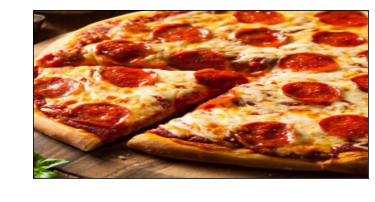

In [151]:
image = cv2.imread('/Users/pedrocerbino/Desktop/pizza.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)
plt.tick_params(axis='x', colors='w')
plt.tick_params(axis='y', colors='w');

## Color Identification

In [18]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [19]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [141]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items(), key=lambda x: x[1]))

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        _, _, autotexts =plt.pie(counts.values(), labels=hex_colors, colors=hex_colors,
                                 textprops={'color':'w','size':13}, autopct='%1.1f%%',
                                 explode = np.arange(1,number_of_colors+1)/35, shadow=True,
                                 counterclock=False)
        for autotext in autotexts:
            autotext.set_color('black')
            autotext.set_size(11)
        plt.suptitle('Food Colors Percentage',size=20,color='w',y=1.06)
    return rgb_colors

{6: 20412, 2: 25161, 0: 26295, 3: 28216, 4: 30526, 7: 33072, 1: 37710, 5: 38608}
<class 'dict'>


[array([109.1842621 ,  29.79640322,  11.88873292]),
 array([215.81615101,  93.59401758,  21.80975758]),
 array([153.77438008, 102.45114182,  62.72336568]),
 array([230.38240505, 152.16057256,  61.24592545]),
 array([44.75452315, 14.25274006,  5.34182889]),
 array([176.59293248,  42.0644194 ,   9.10324682]),
 array([247.16854784, 219.4720217 , 175.92741196]),
 array([239.81938513, 187.76477359, 118.28087233])]

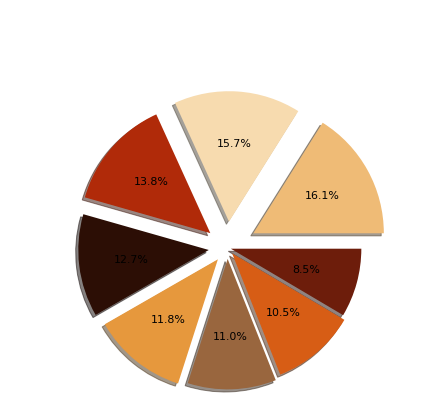

In [142]:
get_colors(get_image('/Users/pedrocerbino/Desktop/pizza.jpg'),8,True)

## Search Images using color

In [117]:
((np.arange(1,8+1)))/20

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ])